In [1]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import csv
import seaborn as sns
from collections import Counter

import statistics as stats

from numpy.random import seed

import seaborn as sns; sns.set()

import os

import warnings

In [2]:
#Store CSV into Dataframe

df = "./Resources/train.csv"
train_df = pd.read_csv(df,encoding='latin-1')
train_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
#Check to see how many values are in the data frame
train_df.shape

(614, 13)

In [4]:
#Confirm null values
train_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
# Confirm data types
train_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
#Remove null values 
train_df = train_df.dropna(how='any',axis=0)

In [7]:
#Confirm if nulls were removed
train_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
#lets look for duplicated Loan IDs in the data set
train_df[train_df.duplicated(['Loan_ID'], keep=False)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [9]:
train_df.to_csv(r'/Users/aliciasmith/Desktop/Final_Project/Resources/train_df.csv', index = False)


Exploratory Data Analysis

In [10]:
train_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

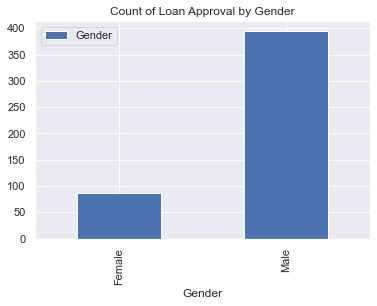

In [11]:
#Creating a dataframe grouping by the column 'Gender'
gender_df = train_df.groupby('Gender')


#Record count number of data points for each day
gender_count_df = pd.DataFrame.from_dict(gender_df['Gender'].count())
gender_count_df

#Bar Chart based off of the group series 
gender_count_chart = gender_count_df.plot(kind='bar', title= "Count of Loan Approval by Gender")


In [17]:

# #Changing gender column to male, female, and unknown vs 0,1,2 
# combined2019_CitiBike_df8["gender"] = combined2019_CitiBike_df8["gender"].map(str)
# combined2019_CitiBike_df8["gender"] = combined2019_CitiBike_df8["gender"].replace(['0','1','2'],['Unknown','Male','Female'])
# combined2019_CitiBike_df8.head()



# #Creating a dataframe grouping by the column 'Gender'
# marital_status_df = train_df.groupby('Married')
# marital_status_df

#Changing Married Column to married and single
marital_status_df["Married"]= marital_status_df["Married"].replace(['yes','no'],['married','single'])
marital_status_df.head()

# #Record count number of data points for each day
# marital_status_count_df = pd.DataFrame.from_dict(gender_df['Married'].count())
# marital_status_count_df

# #Bar Chart based off of the group series 
# martial_count_chart = marital_status_count_df.plot(kind='bar', title= "Count of Loan Approval by Marital Status")


AttributeError: 'SeriesGroupBy' object has no attribute 'replace'